# <center><font color='#333333'>Use Python to Automate the PowerPoint Update</font></center>
### <center><font color='#3b5998'>Created by cyda - Yeung Wong & Carrie Lo</font></center>

--------------------------------------------------------------------------------------
![logo](https://4.bp.blogspot.com/-LAXjdvVCYCU/WxeQFKQ-1wI/AAAAAAAAACs/o8IJ1eLLAEwQYv2Az7EqQi9jODTqRx7wACK4BGAYYCw/s1000/tight%2Bbanner_with_description.png)

--------------------------------------------------------------------------------------
Please acknowledge <b>team cyda - Yeung Wong & Carrie Lo</b> when using the code

<b><font color='#3b5998'>If you find this script is helpful, please feel free to endorse us through Linkedin!</font></b>

<b>Linkedin:</b>

Yeung Wong - https://www.linkedin.com/in/yeungwong/

Carrie Lo - https://www.linkedin.com/in/carrielsc/

--------------------------------------------------------------------------------------

# Step 1 - Data Preprocessing

In [1]:
import requests
import pandas as pd
from datetime import datetime

datetime_now = datetime.now()
full_list_url='https://finance.yahoo.com/currencies'
full_list_page = requests.get(full_list_url)
df = pd.read_html(full_list_page.text)[0].drop_duplicates()
df['pct_change'] = df['% Change'].str.slice(stop=-1).astype(float)
df

,Symbol,Name,Last Price,Change,% Change,52 Week Range,Day Chart,pct_change
0,EURUSD=X,EUR/USD,1.1322,-0.0022,-0.19%,NaN,NaN,-0.19
1,JPY=X,USD/JPY,113.5700,-0.1670,-0.15%,NaN,NaN,-0.15
2,GBPUSD=X,GBP/USD,1.3207,0.0001,+0.00%,NaN,NaN,0.00
3,AUDUSD=X,AUD/USD,0.7165,-0.0004,-0.06%,NaN,NaN,-0.06
4,NZDUSD=X,NZD/USD,0.6809,0.0001,+0.01%,NaN,NaN,0.01
5,EURJPY=X,EUR/JPY,128.5450,-0.4420,-0.34%,NaN,NaN,-0.34
6,GBPJPY=X,GBP/JPY,149.9880,-0.1670,-0.11%,NaN,NaN,-0.11
7,EURGBP=X,EUR/GBP,0.8570,-0.0015,-0.18%,NaN,NaN,-0.18
8,EURCAD=X,EUR/CAD,1.4345,-0.0003,-0.02%,NaN,NaN,-0.02
9,EURSEK=X,EUR/SEK,10.2527,0.0000,+0.00%,NaN,NaN,0.00


In [2]:
top_df = df.sort_values(['pct_change'], ascending=False).reset_index(drop=True)[:5]
top_df = top_df[['Name', 'Last Price', 'Change', '% Change']]
top_df

,Name,Last Price,Change,% Change
0,USD/ZAR,15.7678,0.0545,+0.35%
1,USD/THB,33.4590,0.1150,+0.34%
2,USD/PHP,50.3930,0.1730,+0.34%
3,USD/INR,75.5500,0.1950,+0.26%
4,USD/RUB,73.6453,0.1587,+0.22%


In [3]:
bottom_df = df.sort_values(['pct_change'], ascending=True).reset_index(drop=True)[:5]
bottom_df = bottom_df[['Name', 'Last Price', 'Change', '% Change']]
bottom_df

,Name,Last Price,Change,% Change
0,EUR/JPY,128.5450,-0.4420,-0.34%
1,EUR/USD,1.1322,-0.0022,-0.19%
2,USD/MYR,4.2150,-0.0080,-0.19%
3,EUR/GBP,0.8570,-0.0015,-0.18%
4,USD/JPY,113.5700,-0.1670,-0.15%


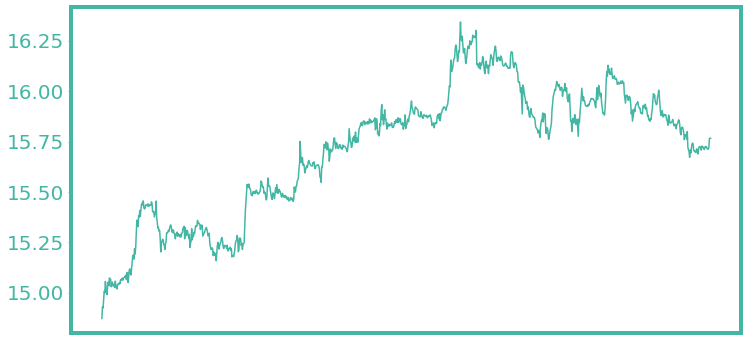

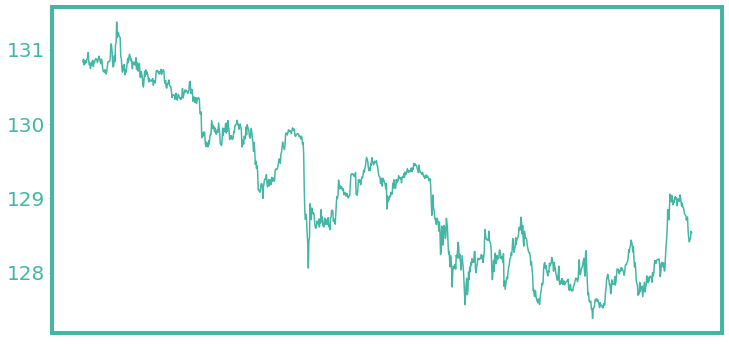

In [4]:
import json
import matplotlib.pyplot as plt

top_name = top_df['Name'][0].replace('/', '')
bottom_name = bottom_df['Name'][0].replace('/', '')

for idx in range(2):
    
    name = [top_name, bottom_name][idx]
    file_path = ['top.png', 'bottom.png']
    
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/' + name + '=X?region=US&lang=en-US&includePrePost=false&interval=30m&useYfid=true&range=1mo&corsDomain=finance.yahoo.com&.tsrc=finance'
    header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    page = requests.get(url, headers=header)
    temp_json = json.loads(page.text)
    price_list = temp_json['chart']['result'][0]['indicators']['quote'][0]['close']
    price_list = [price for price in price_list if price != None]
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(price_list, color='#43B7A4')
    ax.set_xticks([])
    ax.tick_params(axis='y', colors='#43B7A4', labelsize=20)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_color('#43B7A4')
        ax.spines[axis].set_linewidth(4)
    plt.savefig(file_path[idx], transparent=True)

# Step 2 - PowerPoint Updating

In [5]:
from pptx import Presentation
from pptx.util import Inches

# Open the PPT
currencies_ppt = Presentation('Currencies.pptx')

# Select the slide to be editted
slide = currencies_ppt.slides[0]

# Remove the old figures
shapes = slide.shapes
for shape in shapes:
    #print(shape.shape_type)
    if shape.shape_type == 13: # 13 = PICTURE
        shapes.element.remove(shape.element)

# Add the new figures
top_img_path = 'top.png'
bottom_img_path = 'bottom.png'
top_pic = slide.shapes.add_picture(top_img_path, Inches(0.40), Inches(4.85), width=Inches(5.30))
bottom_pic = slide.shapes.add_picture(bottom_img_path, Inches(5.25), Inches(4.85), width=Inches(5.30))

# Send the figures to the back
ref_element = slide.shapes[0]._element
ref_element.addprevious(top_pic._element)
ref_element.addprevious(bottom_pic._element)

# Separate text box and table
shapes = slide.shapes
text_box_list = []
auto_shape_list = []
table_list = []
for shape_idx in range(len(shapes)):
    shape = shapes[shape_idx]
    if shape.shape_type == 17: # TEXT_BOX
        text_box_list.append(shape_idx)
    if shape.shape_type == 1: # AUTO_SHAPE
        auto_shape_list.append(shape_idx)
    if shape.shape_type == 19: # TABLE
        table_list.append(shape_idx)

# Last update date shape index
last_update_date_textbox_height = max([shapes[shape_idx].height for shape_idx in text_box_list])
last_update_date_idx = [shape_idx for shape_idx in text_box_list if shapes[shape_idx].height == last_update_date_textbox_height][0]

# Top 5 figure label shape index
top_label_left = min([shapes[shape_idx].left for shape_idx in auto_shape_list])
top_label_idx = [shape_idx for shape_idx in auto_shape_list if shapes[shape_idx].left == top_label_left][0]
auto_shape_list.remove(top_label_idx)

# Bottom 5 figure label shape index
bottom_label_idx = auto_shape_list[0]

# Top 5 table shape index
top_table_left = min([shapes[shape_idx].left for shape_idx in table_list])
top_table_idx = [shape_idx for shape_idx in table_list if shapes[shape_idx].left == top_table_left][0]
table_list.remove(top_table_idx)

# Bottom 5 table shape index
bottom_table_idx = table_list[0]

# Update last update date
paragraph = shapes[last_update_date_idx].text_frame.paragraphs[0]
paragraph.runs[4].text = datetime_now.strftime("%#d %b %Y %H:%M")

# Update top 5 figure label
paragraph = shapes[top_label_idx].text_frame.paragraphs[0]
paragraph.runs[0].text = top_df['Name'][0].replace('/', ' / ')

# Update bottom 5 figure label
paragraph = shapes[bottom_label_idx].text_frame.paragraphs[0]
paragraph.runs[0].text = bottom_df['Name'][0].replace('/', ' / ')

# Update top table
top_table = shapes[top_table_idx].table
for i in range(5):
    for j in range(4):
        cell = top_table.cell(i+1, j)
        paragraph = cell.text_frame.paragraphs[0]
        run = paragraph.runs[0]
        run.text = str(top_df.iloc[i, j])

# Update bottom table
bottom_table = shapes[bottom_table_idx].table
for i in range(5):
    for j in range(4):
        cell = bottom_table.cell(i+1, j)
        paragraph = cell.text_frame.paragraphs[0]
        run = paragraph.runs[0]
        run.text = str(bottom_df.iloc[i, j])
        
# Save the PPT
currencies_ppt.save('New_Currencies.pptx')

# Step 3 - Export to Different Formats

In [6]:
import win32com.client
import os

#Open the PPT
ppt_file_path = os.getcwd() + '\\New_Currencies.pptx'
powerpoint = win32com.client.Dispatch('Powerpoint.Application')
deck = powerpoint.Presentations.Open(ppt_file_path)

# Save the PNG
img_file_path = os.getcwd() + '\\Currencies.png'
powerpoint.ActivePresentation.Slides[0].Export(img_file_path, 'PNG')

# Save the PDF
pdf_file_path = os.getcwd() + '\\Currencies.pdf'
deck.SaveAs(pdf_file_path, 32)

# Quit the PPT
deck.Close()
powerpoint.Quit()
os.system('taskkill /F /IM POWERPNT.EXE')

0